# Clustering Different Types of Wine 
* 178 samples, 13 features (e.g., alcohol, acidity, flavonoids)
* Dataset Link: https://archive.ics.uci.edu/dataset/109/wine
* Additional Information: These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines.

**What is clustring?**
Clustering is a machine learning technique used to group similar data points together into clusters, where data points within a cluster are more similar to each other than to those in other clusters. It's an unsupervised learning method, meaning it doesn't rely on pre-defined labels or categories

## Step 1: Loading the dataset

Our data is stored as csv. In R we use `read.csv()` to import the data and store it in a data frame.

In [1]:
wine <- read.csv("/kaggle/input/clustering-datasets/2-wine-dataset/wine.data")

## Step 2: Provide a summary

In order to see the 5 numbers summary which includes the min, max, median, 1st, and the 3rd quartile of the data, we use the `summary()` function.

In [2]:
summary(wine)

       X1            X14.23          X1.71          X2.43           X15.6      
 Min.   :1.000   Min.   :11.03   Min.   :0.74   Min.   :1.360   Min.   :10.60  
 1st Qu.:1.000   1st Qu.:12.36   1st Qu.:1.60   1st Qu.:2.210   1st Qu.:17.20  
 Median :2.000   Median :13.05   Median :1.87   Median :2.360   Median :19.50  
 Mean   :1.944   Mean   :12.99   Mean   :2.34   Mean   :2.366   Mean   :19.52  
 3rd Qu.:3.000   3rd Qu.:13.67   3rd Qu.:3.10   3rd Qu.:2.560   3rd Qu.:21.50  
 Max.   :3.000   Max.   :14.83   Max.   :5.80   Max.   :3.230   Max.   :30.00  
      X127             X2.8           X3.06            X.28       
 Min.   : 70.00   Min.   :0.980   Min.   :0.340   Min.   :0.1300  
 1st Qu.: 88.00   1st Qu.:1.740   1st Qu.:1.200   1st Qu.:0.2700  
 Median : 98.00   Median :2.350   Median :2.130   Median :0.3400  
 Mean   : 99.59   Mean   :2.292   Mean   :2.023   Mean   :0.3623  
 3rd Qu.:107.00   3rd Qu.:2.800   3rd Qu.:2.860   3rd Qu.:0.4400  
 Max.   :162.00   Max.   :3.880   Max.

## Step 3: Show the first 8 observations

To show the first 8 observations we can use the `head()` function. By default it shows the first 6 rows of the data, therefore we should manually give 8 as the second argument.

In [3]:
head(wine, 8)

,X1,X14.23,X1.71,X2.43,X15.6,X127,X2.8,X3.06,X.28,X2.29,X5.64,X1.04,X3.92,X1065
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045


The column names are not readable, based on the description provided in the dataset in order to increase the readability of our code, I rename them all.


In [4]:
colnames(wine) <- c(
"Class",
"Alcohol",
"Malic acid",
"Ash",
"Magnesium",
"Alcalinity of ash",
"Total phenols",
"Flavanoids",
"Nonflavanoid phenols",
"Proanthocyanins",
"Color intensity",
"Hue",
"OD280/OD315 of diluted wines",
"Proline"
)

## Step 4: Check for missing values and impute/delete if necessary

We can check for missing values in our data frame using the `is.na()` function. This will return a list of boolean values, true if an element is missing and false if it's not. Since we want to check how many missing values exist in our data we use the `sum()` function.

In [5]:
sum(is.na(wine))

[1] 0

## Step 5: Select only numerical variables and exclude the class label (if numeric)
First let's look at the structure of our data using the `str()` function. 

We see that two of our columns are stored as whole numbers (int), we tell R to treat them as double (num) for consistency. To achieve that we use `as.numeric()` function.



In [6]:
str(wine)

'data.frame':	177 obs. of  14 variables:
 $ Class                       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol                     : num  13.2 13.2 14.4 13.2 14.2 ...
 $ Malic acid                  : num  1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 ...
 $ Ash                         : num  2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 2.3 ...
 $ Magnesium                   : num  11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 18 ...
 $ Alcalinity of ash           : int  100 101 113 118 112 96 121 97 98 105 ...
 $ Total phenols               : num  2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 2.95 ...
 $ Flavanoids                  : num  2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 3.32 ...
 $ Nonflavanoid phenols        : num  0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 0.22 ...
 $ Proanthocyanins             : num  1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 2.38 ...
 $ Color intensity             : num  4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 5.75 ...
 $ Hue                         : n

In [7]:
wine[["Alcalinity of ash"]] <- as.numeric(wine[["Alcalinity of ash"]])
wine[["Proline"]]<- as.numeric(wine[["Proline"]])

In [8]:
str(wine)

'data.frame':	177 obs. of  14 variables:
 $ Class                       : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Alcohol                     : num  13.2 13.2 14.4 13.2 14.2 ...
 $ Malic acid                  : num  1.78 2.36 1.95 2.59 1.76 1.87 2.15 1.64 1.35 2.16 ...
 $ Ash                         : num  2.14 2.67 2.5 2.87 2.45 2.45 2.61 2.17 2.27 2.3 ...
 $ Magnesium                   : num  11.2 18.6 16.8 21 15.2 14.6 17.6 14 16 18 ...
 $ Alcalinity of ash           : num  100 101 113 118 112 96 121 97 98 105 ...
 $ Total phenols               : num  2.65 2.8 3.85 2.8 3.27 2.5 2.6 2.8 2.98 2.95 ...
 $ Flavanoids                  : num  2.76 3.24 3.49 2.69 3.39 2.52 2.51 2.98 3.15 3.32 ...
 $ Nonflavanoid phenols        : num  0.26 0.3 0.24 0.39 0.34 0.3 0.31 0.29 0.22 0.22 ...
 $ Proanthocyanins             : num  1.28 2.81 2.18 1.82 1.97 1.98 1.25 1.98 1.85 2.38 ...
 $ Color intensity             : num  4.38 5.68 7.8 4.32 6.75 5.25 5.05 5.2 7.22 5.75 ...
 $ Hue                         : n

The first column is the class label, and since we want to calculate it with the clustering algorithms, we exclude it from our data frame. In R we can this in different ways, here I use the `subset()` function and using the *select* argument I drop the first column.

In [9]:
dropped_class <- wine$Class  # for future comparison
wine <- subset(wine, select = -Class)

In [10]:
head(wine, 5)

,Alcohol,Malic acid,Ash,Magnesium,Alcalinity of ash,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


## Step 6: Normalizing the data
The variables have different units or scales, and we are going to perform PCA and clustering. Since those algorithms are sensitive to scale we should first standardized the data. In R it is achieved by `scale()` function.

The `center=` argument specify the mean and the `scale=` argument specify the standard deviation.

Note that although normalization and standardization are used interchangably but they are quite different. The function `scale()` does standardazation.

Standardization transforms data to have:
* mean = 0
* SD = 1

$$z = \frac{x - mean}{sd}$$

Normalization transforms data to a specific range:

$$ x^{'}= \frac{x-min}{max - min}$$

In [11]:
wine_standardized <- scale(wine, center = TRUE, scale = TRUE)

In [12]:
head(wine_standardized, 5)

,Alcohol,Malic acid,Ash,Magnesium,Alcalinity of ash,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,0.2551008,-0.50020530,-0.8221529,-2.4930372,0.02909756,0.5710456,0.7375437,-0.8208101,-0.5370519,-0.2903066,0.4059482,1.1284966,0.96830550
2,0.2056453,0.01796903,1.1045562,-0.2748590,0.09964918,0.8104843,1.2181890,-0.4999191,2.1399040,0.2689663,0.3186634,0.8023031,1.39703475
3,1.7016732,-0.34832662,0.4865552,-0.8144158,0.94626865,2.4865554,1.4685250,-0.9812556,1.0376281,1.1810114,-0.4232572,1.1994082,2.33388755
4,0.3045563,0.22345196,1.8316163,0.4445501,1.29902677,0.8104843,0.6674496,0.2220856,0.4077561,-0.3161192,0.3623058,0.4619272,-0.03206274
5,1.4914875,-0.51807338,0.3047901,-1.2940219,0.87571703,1.5607256,1.3683906,-0.1790282,0.6702028,0.7292910,0.4059482,0.3484686,2.23861439


## Step 7: Find the optimal number of clusters using the Elbow Method
To determine the number of clusters, we use the **Within Sum of Squares (WSS)** metric.

WSS is the sum of squares of the distance between each data piont and closest centroid.

$$
A = \sum_{i=1}^{k} \sum_{p \in C_i}^ {M} \left({p - q_i} \right)^2
$$

* M number of observations, k number of clusters
* ${p \in C_i}$ is observation in cluster $C_i$, $q_i$ is the centroid of cluster $C_i$

If K + 1 clusters don't reduce the value of WSS with respect to k clusters, no benefit to add another cluster.

In [13]:
library(ggplot2)
library(factoextra)
library(dplyr)

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa




Attaching package: ‘dplyr’




The following objects are masked from ‘package:stats’:

    filter, lag




The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




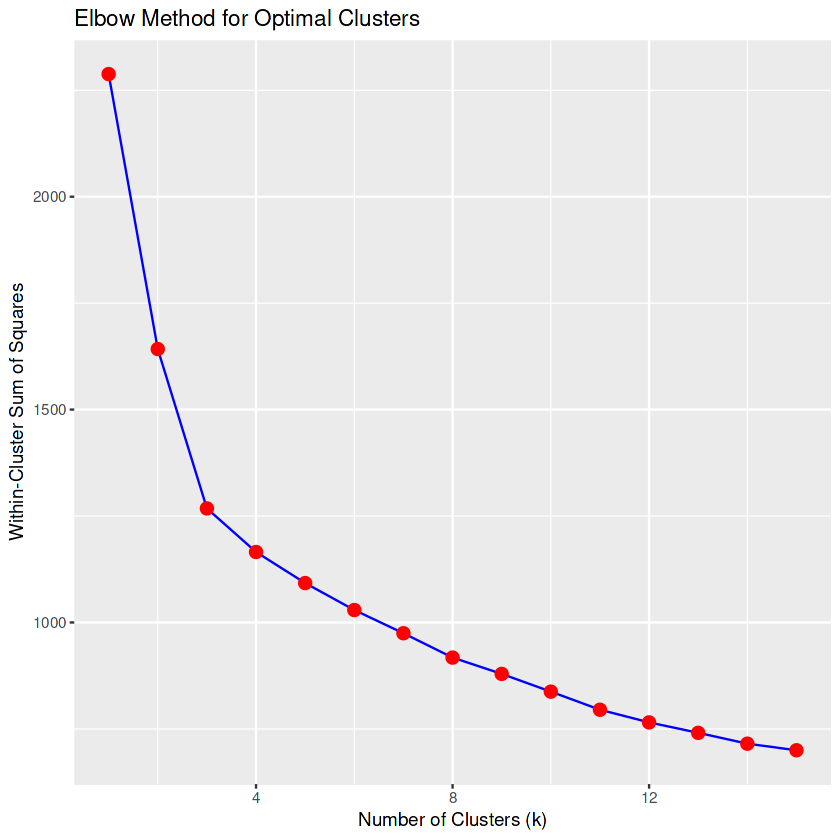

In [14]:
wss <- numeric(15)
for(k in 1:15) {
    wss[k] <- sum(kmeans(wine_standardized,
                        centers = k,
                        nstart = 25)$withinss)
}
ggplot(data.frame(k = 1:15, wss = wss), aes(x = k, y = wss)) +
    geom_line(color = "blue") +
    geom_point(size = 3, color = "red") + 
    labs(title = "Elbow Method for Optimal Clusters",
        x = "Number of Clusters (k)",
        y = "Within-Cluster Sum of Squares")

By just observing the graph, it suggests k to be equal to 3.

## Step 8: Apply Hierarchical Clustering & k-means with the same number of clusters

### Hierarchical Clustering

Here we are going to use Ward.D2 clustring which minimizes the total within-cluster variance using the squared Eculidean distance.
When mergin two clusters A and B, the increase in the total within-cluster sum of squares (WCSS) is given by:

$$
\Delta(A, B) = \frac{n_A n_B}{n_A + n_B} \left\| \bar{x}_A - \bar{x}_B \right\|^2
$$

where:
* ${n_A, n_B}$: number of points in clusters A and B,
* $\bar{x}_A - \bar{x}_B$: centroids (means) of clusters A and B,
* $|\bar{x}_A - \bar{x}_B|^2$: squared Euclidean distance between the centroids of A and B.


In [15]:
dist_matrix <- dist(wine_standardized, method = "euclidean")
hc <- hclust(dist_matrix, method = "ward.D2")
wine$ClusterHC <- as.factor(cutree(hc, k = 3))

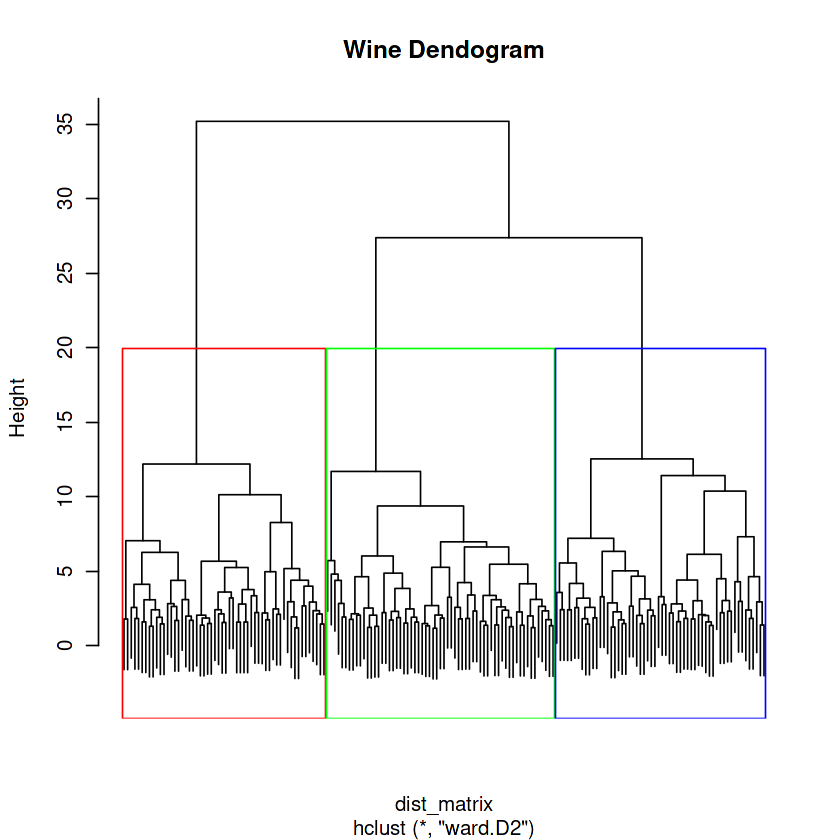

In [16]:
plot(hc, labels = F,
    main = "Wine Dendogram")

rect.hclust(hc, k = 3, border = c("red", "green", "blue"))

### K-means Clustering
$$
\underset{C}{\arg\min} \sum_{k=1}^{K} \sum_{x_i \in C_k} \left\| x_i - \mu_k \right\|^2
$$

* $K$: number of clusters
* $C_k$: set of points assigned to cluster k
* $\mu_k$: centroid(mean) of cluster k
* $x_i$: data point
* $| x_i - \mu_k |^2$: squared Euclidean distance between point and its cluster center

In [17]:
kmeans_result <- kmeans(wine_standardized, centers = 3, nstart = 25)
wine$ClusterKM <- as.factor(kmeans_result$cluster)

## Step 9: Perform PCA visualization (fviz_pca_biplot())

PCA transforms a high-dimensional dataset into a lower-dimensional space while preserving as much variance (informaion) as possible. It finds new axes (princial compoonents) that are linear combinations of the original features.

To visualize the pca results we use `fviz_pca_biplot()` which is a function of the `factoextra` library.

A biplot is a visualization that shows:
* Observations(samples) as points
* Variables(features) as arrows

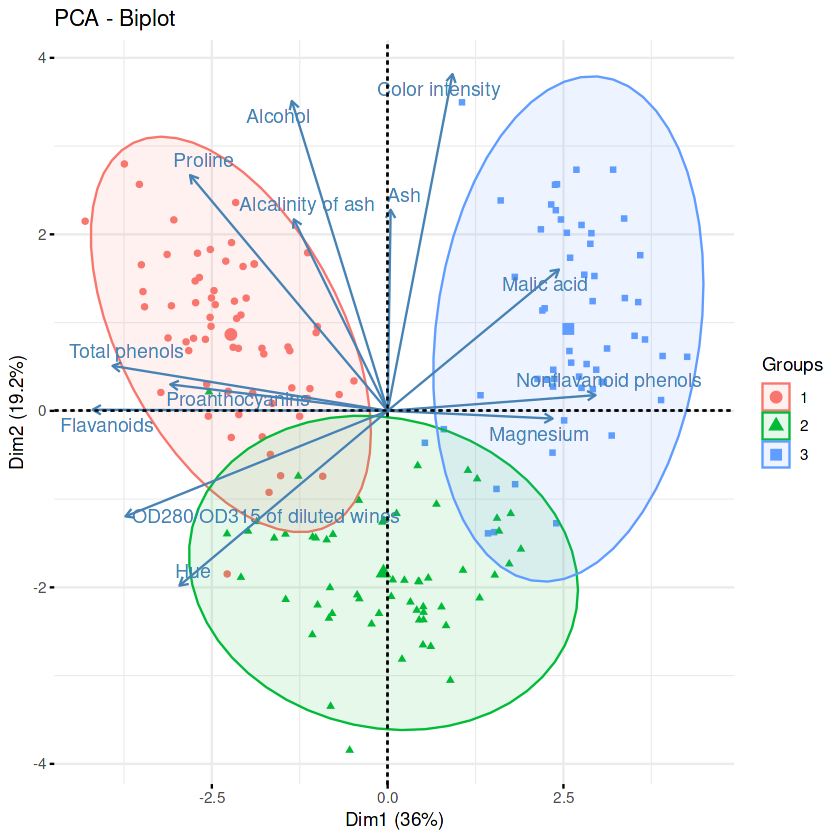

In [18]:
pca_result <- prcomp(wine_standardized)
fviz_pca_biplot(pca_result,
               geom = "point",
               habillage = wine$ClusterHC,
               addEllipses = T,
               ellipse.level = 0.95,
               repel = T)

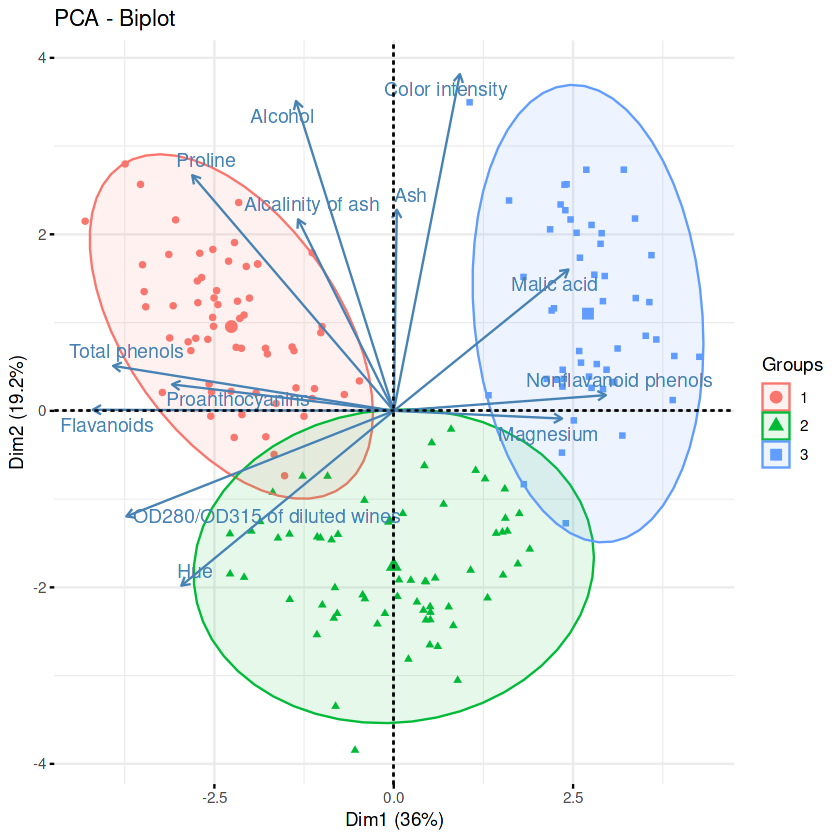

In [19]:
fviz_pca_biplot(pca_result,
               geom = "point",
               habillage = wine$ClusterKM,
               addEllipses = T,
               ellipse.level = 0.95,
               repel = T)

## Step 10: Compare clustering results using table()

In [20]:
contingency_table <- table(
    Hierarichical = wine$ClusterHC,
    KMeans = wine$ClusterKM
)

contingency_table

             KMeans
Hierarichical  1  2  3
            1 60  3  0
            2  1 57  0
            3  0  5 51

This contingency matrix means that the clusters are highly similar, but the labels are shuffled differently in each run.
In an arbitrary run these were the results:

* 60 samples are in cluster 1 by HC and cluster 2 by KM.
* 57 samples are in cluster 2 by HC and cluster 1 by KM.
* 51 samples are in cluster 3 by HC and cluster 3 by KM.

In [21]:
table(
    Hierarichical = wine$ClusterHC,
    DefaultClass = dropped_class
)

             DefaultClass
Hierarichical  1  2  3
            1 58  5  0
            2  0 58  0
            3  0  8 48

In [22]:
table(
    KMeans = wine$ClusterKM,
    DefaultClass = dropped_class
)

      DefaultClass
KMeans  1  2  3
     1 58  3  0
     2  0 65  0
     3  0  3 48

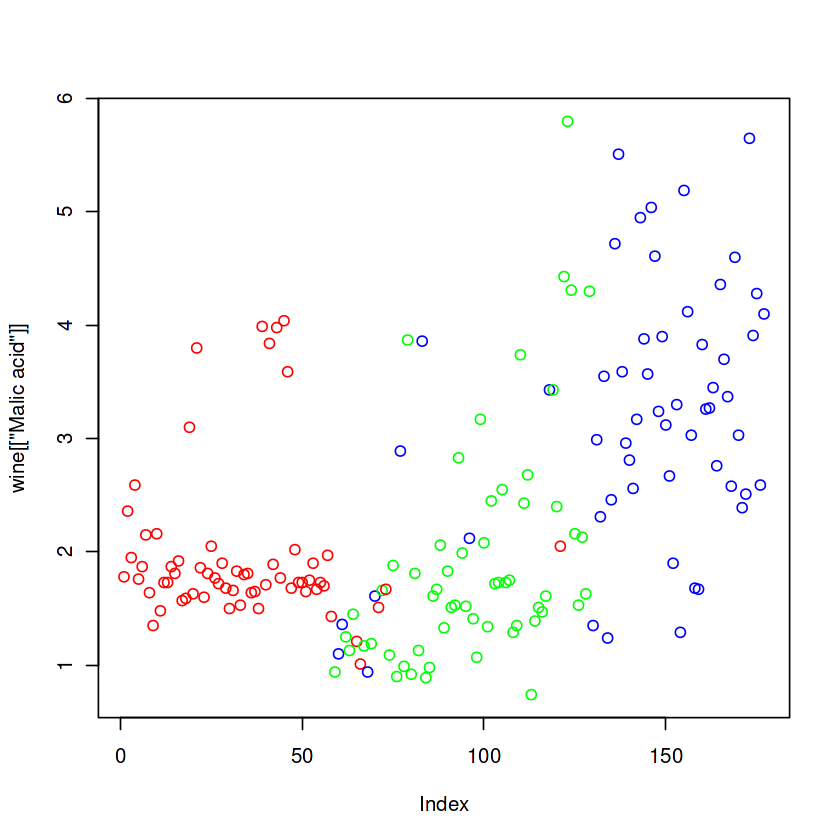

In [23]:
colors <- c("red", "green", "blue")[as.integer(wine$ClusterHC)]
plot(x = wine[["Malic acid"]], col = colors)

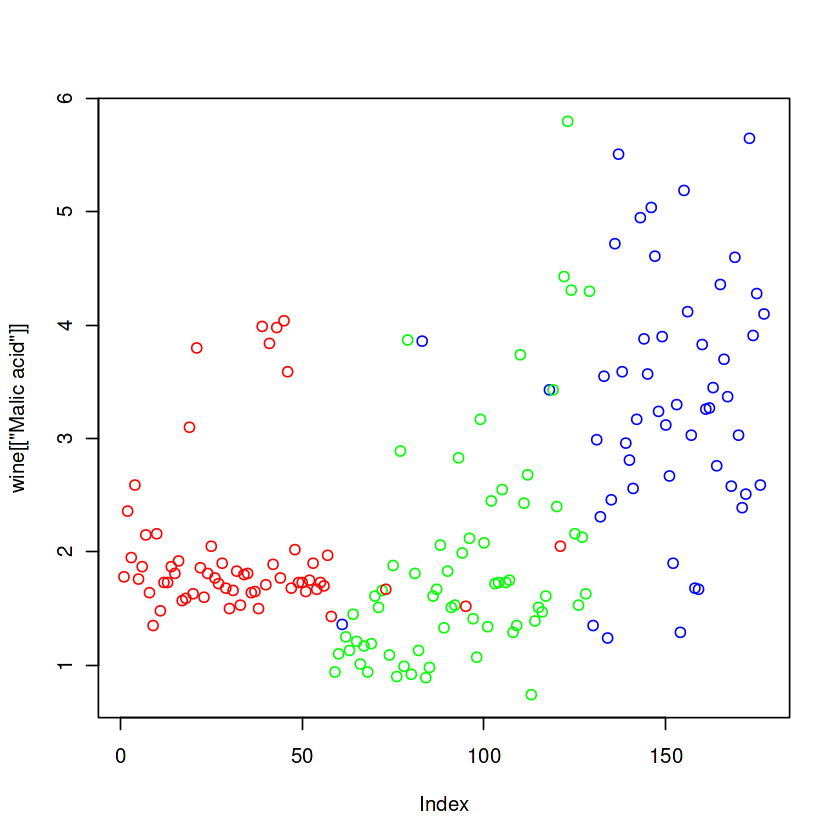

In [24]:
colors <- c("red", "green", "blue")[as.integer(wine$ClusterKM)]
plot(x = wine[["Malic acid"]], col = colors)

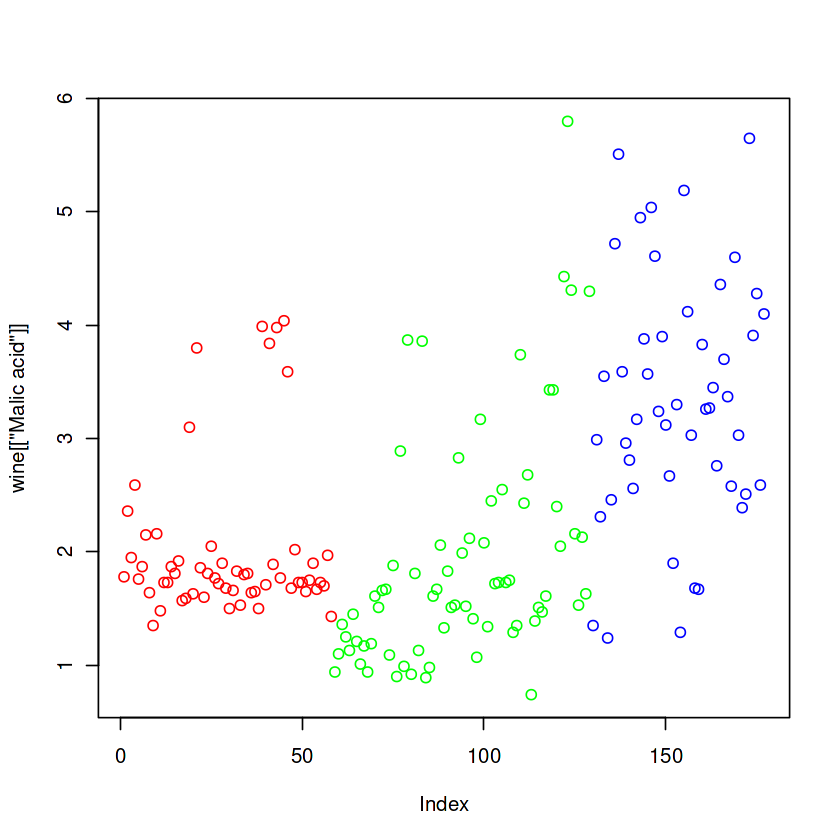

In [25]:
colors <- c("red", "green", "blue")[as.integer(dropped_class)]
plot(x = wine[["Malic acid"]], col = colors)

---